In [73]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



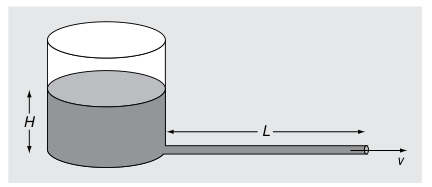

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [74]:
# a) Definición de función
def velocidad_agua(H, L, t):

  """
  Cálculo de la velocidad de descarga de un tanque cilíndrico.

  Args:
    :H: carga hidrostática [m]
    :L: longitud del tubo [m]
    :t: tiempo transcurrido [s]

  Returns:
    :v: velocidad de descarga [m/s]
  """

  # Constantes
  g = 9.81  # [m * s ** -2]

  return np.sqrt(2 * g * H) * np.tanh((np.sqrt(2 * g * H) / (2 * L)) * t)



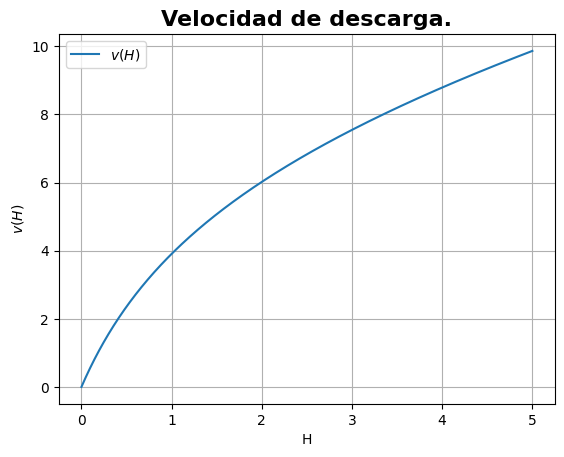

In [84]:
# b) Gráfico de v(H)

H = np.linspace(0, 5, 1000)

# Valores de la función
v_H = velocidad_agua(H, 4, 2.5)

plt.title('Velocidad de descarga.', fontsize=16, fontweight='bold')
plt.plot(H, v_H, label=r'$v(H)$')
plt.xlabel('H')
plt.ylabel(r'$v(H)$')
plt.legend()
plt.grid()
plt.show()

In [76]:
# c) Raíz intuitiva

indice_h = np.where(v_H == 5)
raiz_h = H[indice_h]
print(raiz_h)

print(velocidad_agua(raiz_h, 4, 2.5))


[]
[]


In [77]:
# d) Raíz a partir del método de bisección
funcion_vel = lambda h: np.sqrt(2 * 9.81 * h) * np.tanh((np.sqrt(2 * 9.81 * h) / (2 * 4)) * 2.5) - 5

def biseccion(f, a:float, b:float, tol=1e-7, max_iter=100) -> tuple:

  """
  Implementación del método de bisección para determinar raíces de funciones
  continuas en un intervalo [a, b].

  Args:
    f: función continua analizada
    a: Límite inferior del intervalo
    b: Límite superior del intervalo
    tol: error en la solución
    max_iter: número máximo de iteraciones para determinar la solución.

  returns:
    Aproximación de la raíz
    Iteraciones realizadas
    Array con errores en cada cálculo de la solución.
  """

  iter = 0  # Contador para el ciclo while
  iteraciones = np.arange(max_iter)  # Cantidad de iteraciones realiazadas
  errores_abs = np.zeros(max_iter)  # Errores absolutos
  c_inicial = b  # Puede ser cualquier valor en el que f esté definida. General-
                 # mente en el intervalo

  while iter < max_iter:
    c = (a + b) / 2
    errores_abs[iter] = abs(c_inicial - c)

    # Verificación inicial para el método
    if f(a) * f(b) >= 0:
      raise ValueError('Sin raíz en el intervalo o hay múltiples raíces.')

    # Iniciación del método de bisección
    if abs(f(c)) < tol:
      return c # errores_abs[:iter], iteraciones[:iter]

    if f(a) * f(c) < 0:
      b = c
    else:
      a = c

    iter += 1

  raise RuntimeError(f'No se halló la raíz después de {max_iter} iteraciones.')


# Mostrar la raíz por el método de bisección
raiz = biseccion(funcion_vel, 0, 5)
print(f'La carga hidrostática es {raiz} [m].')

La carga hidrostática es 1.4658945798873901 [m].


In [83]:
# e) Raíz por Newton
from scipy.optimize import newton
raiz_n = newton(funcion_vel, 1.5) # Newton-Raphson

print(f'La raiz por el método de Newton-Raphson será {raiz_n} [m]')

La raiz por el método de Newton-Raphson será 1.465894588476788 [m]


# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [79]:
# a) Derivada dc/dt por diferencias finitas

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

def derivada(t, c):

  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia adelante.

  Args:
    :f: función
    :x: punto en el que se quiere calcular la derivada
    :h: paso de discretización

  return:
    primera derivada de f en x
  '''
  n = len(t)
  vals_derivada = []
  for i in range(n):
    if i == 0:
      vals_derivada.append((c[i + 1] - c[i]) / (t[i + 1] - t[i]))
    elif i == (n - 1):
      vals_derivada.append((c[i] - c[i - 1]) / (t[i] - t[i - 1]))
    else:
      vals_derivada.append((c[i + 1] - c[i]) / (t[i + 1] - t[i]))

  return vals_derivada



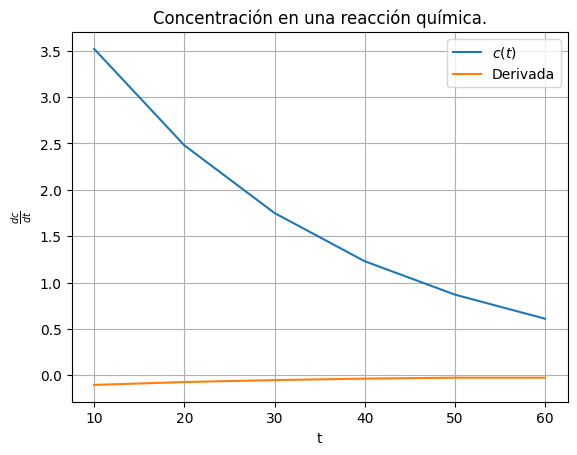

In [80]:
# Gráfica de a)

plt.title('Concentración en una reacción química.')
plt.plot(t, c, label=r'$c(t)$')
plt.plot(t, derivada(t,c), label='Derivada')
plt.xlabel('t')
plt.ylabel(r'$\frac{dc}{dt}$')
plt.legend()
plt.grid()
plt.show()

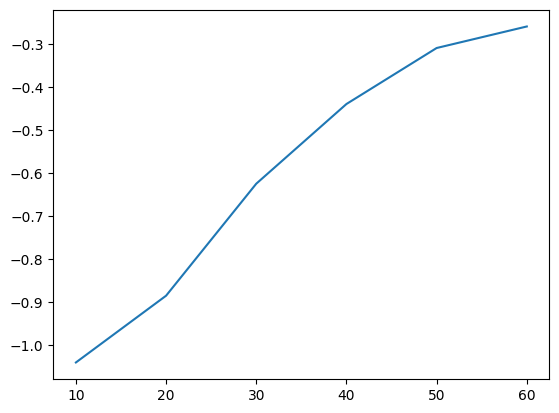

In [81]:
# b) Comparar con numpy.gradient
deriv_grand = np.gradient(c)
plt.plot(t, deriv_grand)

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto


